In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None 

In [2]:
import dame_flame
import random

## Data Cleaning (CREATING flame_enrollment.csv)

In [ ]:
# We start with a dataset that has registry data merged with unequal commute features data (LIFT_registry_UCMerged)

In [4]:
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [5]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [6]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [7]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [8]:
sap["SAP"] = np.where(sap["Study_Card"] == "Subsidized Annual Pass", 1, 0)
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1


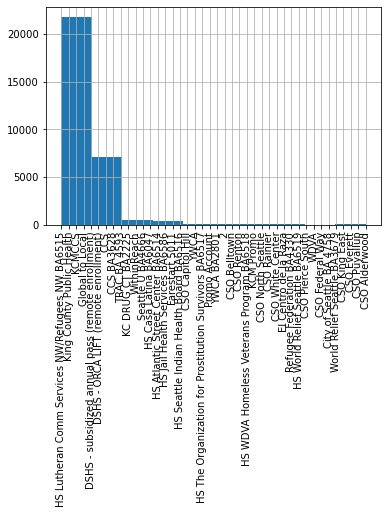

In [9]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

In [10]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [11]:
# Condense CardIssuingAgency to the top 5 agencies and and "other" category
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0,Other
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0,King County Public Health
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0,King County Public Health
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0,KCMCCS
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0,King County Public Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1,King County Public Health
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment)
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0,King County Public Health
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment)


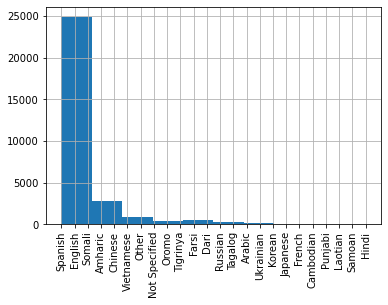

In [12]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

In [13]:
sap["LanguageSpoken"].value_counts()

English          23190
Chinese           2546
Spanish           1582
Dari               423
Vietnamese         418
Other              401
Russian            228
Amharic            205
Not Specified      200
Tigrinya           134
Ukrainian           85
Somali              79
Farsi               67
Korean              66
French              48
Arabic              47
Tagalog             41
Cambodian           21
Oromo               15
Punjabi             13
Japanese             7
Hindi                5
Laotian              3
Samoan               3
Name: LanguageSpoken, dtype: int64

In [14]:
top5 = sap.value_counts("LanguageSpoken").index[:5]
top5.tolist()

['English', 'Chinese', 'Spanish', 'Dari', 'Vietnamese']

In [15]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial_Load,Study_Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language
11,11,44,Hispanic or Latino,Spanish,10/31/2023,2021-10-21,HS Lutheran Comm Services NW/Refugees NW BA6515,530330288022,70.0,NaN,51694-3,4,3,1,1,2,0,Other,Spanish
18,18,46,White,English,8/31/2023,2021-09-01,King County Public Health,530330288022,10.0,NaN,74266-2,4,3,1,1,2,0,King County Public Health,English
26,26,59,White,English,7/31/2023,2021-06-21,King County Public Health,530330288022,10.0,NaN,100890-3,4,3,1,1,2,0,King County Public Health,English
50,50,58,White,English,4/30/2023,2020-11-13,KCMCCS,530330288022,10.0,NaN,159642-2,4,3,1,1,2,0,KCMCCS,English
54,54,58,White,English,10/31/2022,2020-10-23,King County Public Health,530330288022,10.0,NaN,165186-2,4,3,1,1,2,0,King County Public Health,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1,1,King County Public Health,English
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4,0,King County Public Health,English
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English


In [16]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

In [17]:
# bin age.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,Language_Chinese,Language_Dari,Language_English,Language_Other,Language_Spanish,Language_Vietnamese
11,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
18,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
26,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
54,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112521,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112522,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
112523,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [19]:
sap = sap.loc[:, ~sap.columns.isin(['Initial_Load', 'Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
sap

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,stage,Age_bin
11,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,3,2
18,White,4,3,1,1,2,0,King County Public Health,English,74266,2,3
26,White,4,3,1,1,2,0,King County Public Health,English,100890,3,4
50,White,4,3,1,1,2,0,KCMCCS,English,159642,2,4
54,White,4,3,1,1,2,0,King County Public Health,English,165186,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
112520,White,2,1,1,1,1,1,King County Public Health,English,270140,1,2
112521,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,1,2
112522,White,3,4,3,3,4,0,King County Public Health,English,270632,1,2
112523,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,1,2


In [20]:
sap["SAP"].value_counts()

0    18653
1    11225
Name: SAP, dtype: int64

In [21]:
11225/18653 # 0.60 of individuals belong to the SAP program.

0.6017798745510106

In [22]:
# Create the feature 'count_enroll' to count the number of enrollments per user_id.

sap["stage"] = sap["stage"].astype(int)
count_enroll = sap.groupby(["user_id"]).count()[['stage']]
count_enroll = count_enroll.rename(columns={'stage': 'count_enroll'})

In [23]:
sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows

sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [24]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

In [25]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration'])]
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [26]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [27]:
ds_general.isnull().sum() 

RaceDesc                51
OverallJobAccess_D       0
lowwagelaborforce_D      0
Access30Transit_D        0
Access30Transit_ts_D     0
spatialmismatch_D        0
SAP                      0
Agency                   0
Language                 0
user_id                  0
Age_bin                  1
count_enroll             0
dtype: int64

### Dropping the few rows with na values before running FLAME

In [28]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


In [29]:
# Fill in the NA race values, labeling as "Other"
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,51694,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,74266,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,100890,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,159642,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,165186,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,270140,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,270468,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,270632,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,271502,2,1


# Visualizing Count Enrollment

Text(0.5, 1.0, 'Reenrollment count (individuals in SAP)')

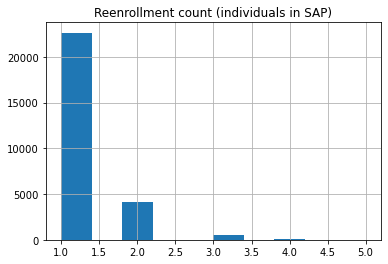

In [33]:
ds_general["count_enroll"].hist()
plt.title('Reenrollment count (individuals in SAP)')

Text(0.5, 1.0, 'Reenrollment count (individuals not in SAP)')

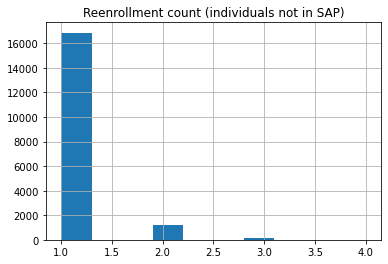

In [34]:
ds_general[(ds_general.SAP == 0)]["count_enroll"].hist()
plt.title('Reenrollment count (individuals not in SAP)')

<AxesSubplot:>

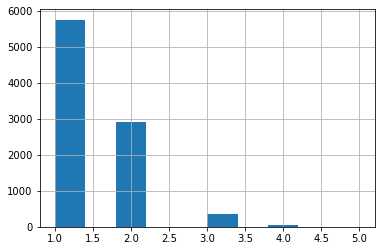

In [35]:
ds_general[(ds_general.SAP == 1)]["count_enroll"].hist()

<AxesSubplot:>

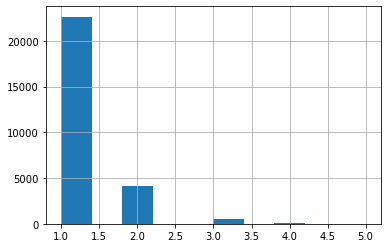

In [36]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()

In [30]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,Hispanic or Latino,4,3,1,1,2,0,Other,Spanish,2,1
1,White,4,3,1,1,2,0,King County Public Health,English,3,1
2,White,4,3,1,1,2,0,King County Public Health,English,4,1
3,White,4,3,1,1,2,0,KCMCCS,English,4,1
4,White,4,3,1,1,2,0,King County Public Health,English,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,White,2,1,1,1,1,1,King County Public Health,English,2,1
29874,White,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,2,1
29875,White,3,4,3,3,4,0,King County Public Health,English,2,1
29876,White,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,2,1


In [31]:
match_all.RaceDesc.value_counts()

White                                        9278
Black or African American                    5524
Asian                                        4226
Hispanic or Latino                           2731
Not Specified                                2547
Other                                        1619
American Indian or Alaska Native              708
Multi-Racial                                  360
Native Hawaiian or Other Pacific Islander     326
Name: RaceDesc, dtype: int64

## Mapping categorical variables to ordinal values for FLAME.

In [32]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)
match_all
# df_trunc['rf_phyp'] = df_trunc['rf_phyp'].map(d)

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,Other,Spanish,2,1
1,0,4,3,1,1,2,0,King County Public Health,English,3,1
2,0,4,3,1,1,2,0,King County Public Health,English,4,1
3,0,4,3,1,1,2,0,KCMCCS,English,4,1
4,0,4,3,1,1,2,0,King County Public Health,English,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,King County Public Health,English,2,1
29874,0,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),English,2,1
29875,0,3,4,3,3,4,0,King County Public Health,English,2,1
29876,0,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),English,2,1


In [33]:
language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,Other,2,2,1
1,0,4,3,1,1,2,0,King County Public Health,0,3,1
2,0,4,3,1,1,2,0,King County Public Health,0,4,1
3,0,4,3,1,1,2,0,KCMCCS,0,4,1
4,0,4,3,1,1,2,0,King County Public Health,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,King County Public Health,0,2,1
29874,0,1,4,1,1,4,0,DSHS - ORCA LIFT (remote enrollment),0,2,1
29875,0,3,4,3,3,4,0,King County Public Health,0,2,1
29876,0,2,2,4,3,2,1,DSHS - subsidized annual pass (remote enrollment),0,2,1


In [34]:
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,5,2,2,1
1,0,4,3,1,1,2,0,0,0,3,1
2,0,4,3,1,1,2,0,0,0,4,1
3,0,4,3,1,1,2,0,4,0,4,1
4,0,4,3,1,1,2,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
29873,0,2,1,1,1,1,1,0,0,2,1
29874,0,1,4,1,1,4,0,1,0,2,1
29875,0,3,4,3,3,4,0,0,0,2,1
29876,0,2,2,4,3,2,1,2,0,2,1


In [ ]:
# match_all.to_csv('/Users/JennyH/cisil-causal-inference/Data/flame_enrollment.csv')  

# FLAME Algorithm For Matching

In [3]:
match_all = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/flame_enrollment.csv")
match_all = match_all.loc[:, ~match_all.columns.isin(['Unnamed: 0'])]
match_all

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
0,3,4,3,1,1,2,0,5,2,2,1
1,0,4,3,1,1,2,0,0,0,3,1
2,0,4,3,1,1,2,0,0,0,4,1
3,0,4,3,1,1,2,0,4,0,4,1
4,0,4,3,1,1,2,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
27314,0,2,1,1,1,1,1,0,0,2,1
27315,0,1,4,1,1,4,0,1,0,2,1
27316,0,3,4,3,3,4,0,0,0,2,1
27317,0,2,2,4,3,2,1,2,0,2,1


In [4]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontreeCV', 
                                            alpha=0.5, 
                                            want_pe=True)

In [5]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1599
	Unmatched treated units:  4360 out of a total of  9068 treated units
	Unmatched control units:  11696 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0.7044958886020544
	Number of matches made in this iteration:  2133
	Number of matches made so far:  11263
	In this iteration, the covariates dropped are:  RaceDesc
Iteration number:  3
	Number of matched groups formed in total:  2534
	Unmatched treated units:  1187 out of a total of  9068 treated units
	Unmatched cont

### Creating Figure Displaying Match Group Size vs. Covariates Matched on.

<ipython-input-9-93a5c53b78b7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


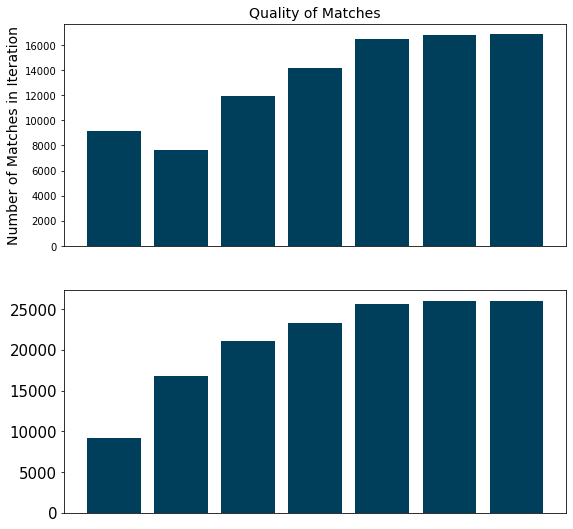

In [9]:
x = ["NONE", "AGENCY", '+AGE', '+RACE', '+Language', '+Access30Transit', '+lowwagelaborforce']
y1 = [9130, 7614, 11950, 14126, 16455, 16815, 16854] 
y2 = [9130, 16744, 21080, 23256, 25585, 25945, 25984]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

# ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)

In [10]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

0.2571807858080115

In [ ]:
# As we can see, the ATE is slightly positive, 
# implying that the subsidized annual pass (SAP) causes an enroller 
# to enroll more than non-SAP recipients by this many more times.


In [11]:
group1 = model_flame_AMT.units_per_group[1]
s_mmg = match_all.loc[group1]
s_mmg # each row of group 1.

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,SAP,Agency,Language,Age_bin,count_enroll
3396,0,4,2,3,3,1,1,0,0,0,1
5227,0,4,2,3,3,1,0,0,0,0,1
20664,0,4,2,3,3,1,0,0,0,0,1


In [69]:
s_mmg.iloc[0]["RaceDesc"] == 0 # color all group numbers of this group.


True

In [6]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)


In [8]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out 

In [9]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

q025 = np.percentile(cate_lst, 2.5)
q975 = np.percentile(cate_lst, 97.5)
print (q025, q975)

0.25167000432257497 0.26269156729343973
-0.3999999999999999 1.3333333333333335


### Scatter Plot Displaying CATES of re-enrollment

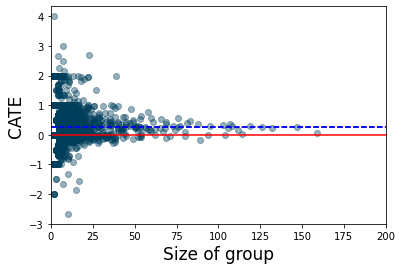

In [14]:
plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='b', linestyle='--')
plt.axhline(y=ub, color='b', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter_enrollment.pdf', bbox_inches="tight")

In [15]:
# Here are the corresponding codes for race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)


In [16]:
## Conf. Interval
## Conf. Interval for Matched groups with Asian Individuals
cate_lst = create_cate_lst(size_asian, cate_asian)

mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.3470227659767201 0.37386033641714034


In [24]:

q025 = np.percentile(cate_test, 2.5) # return 50th percentile, e.g median.
q975 = np.percentile(cate_test, 97.5)
print (q025, q975)

-0.25 1.25


Text(0, 0.5, 'CATE')

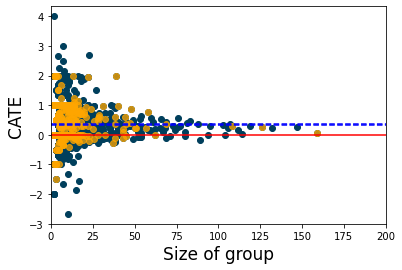

In [17]:
# Scatterplot Displaying the CATE of matched groups with Asian Individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_enroll.pdf', bbox_inches="tight")

Text(0.5, 1.0, 'Visualizing CATE of matched groups with White Individuals')

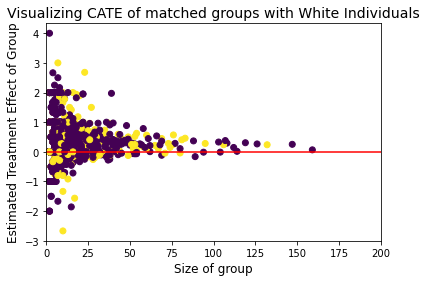

In [48]:
# https://datavizpyr.com/how-to-color-scatterplot-by-a-variable-in-matplotlib/
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}

(size, cate_all, in_white, cate_white) = create_df_scatter("RaceDesc", 0)
plt.scatter(size, cate_all, c=in_white, alpha=2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.title("Visualizing CATE of matched groups with White Individuals", fontsize=14)


Text(0.5, 1.0, 'Visualizing CATE of matched groups with African American Individuals')

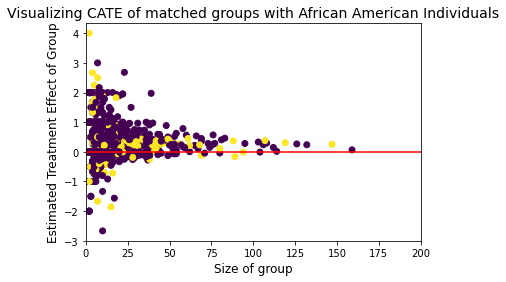

In [57]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}

(size, cate_all, in_aa, cate_aa) = create_df_scatter("RaceDesc", 1)

# plot
plt.scatter(size, cate_all, c=in_aa, alpha=2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.title("Visualizing CATE of matched groups with African American Individuals", fontsize=14)


In [58]:
positive_africanamerican = [g >= 0 for g in cate_aa]

sum(positive_africanamerican)/len(positive_africanamerican)

0.8698060941828255

Text(0.5, 1.0, 'Visualizing CATE of matched groups with Hispanic Individuals')

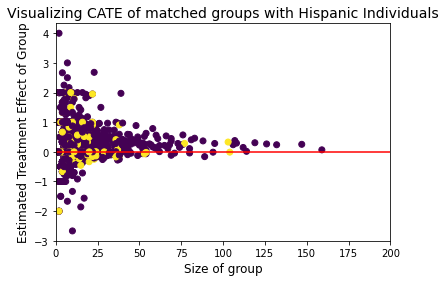

In [67]:
# race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}

(size, cate_all, in_his, cate_his) = create_df_scatter("RaceDesc", 3)

# plot
plt.scatter(size, cate_all, c=in_his, alpha=2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.title("Visualizing CATE of matched groups with Hispanic Individuals", fontsize=14)



In [62]:
positive_his = [g >= 0 for g in cate_his]

sum(positive_his)/len(positive_his)

0.8339622641509434

In [ ]:
# Scatter for AccesstoTransit

Text(0.5, 1.0, 'Access to Transit in Bottom 25%')

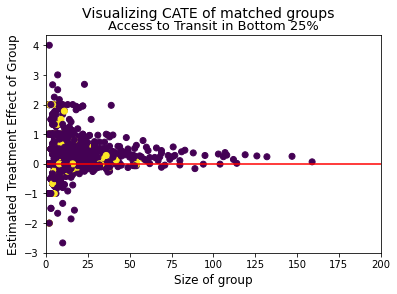

In [89]:
(size, cate_all, in_his, trans_2) = create_df_scatter("Access30Transit_D", 1)

# plot
plt.scatter(size, cate_all, c=in_his, alpha=2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.suptitle("Visualizing CATE of matched groups", fontsize=14)
plt.title("Access to Transit in Bottom 25%", fontsize=13)

In [74]:
positive_trans_2 = [g >= 0 for g in trans_2]

sum(positive_trans_2)/len(positive_trans_2)

0.8872651356993737

Text(0.5, 1.0, 'Access to Transit in Top 25%')

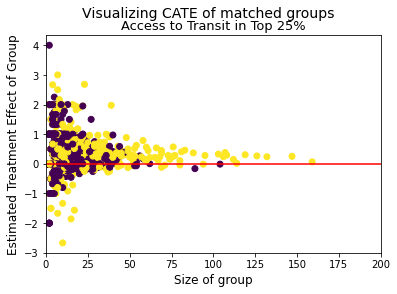

In [88]:
# (size, cate_all, in_his, cate_his) = create_df_scatter("Access30Transit_D", 4)

# plot
plt.scatter(size, cate_all, c=in_his, alpha=2)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
plt.suptitle("Visualizing CATE of matched groups", fontsize=14)
plt.title("Access to Transit in Top 25%", fontsize=13)

In [76]:
positive_his = [g >= 0 for g in cate_his]

sum(positive_his)/len(positive_his)

0.852112676056338

In [149]:
# For each unit, we can see a table displaying the covariates it was matched on.
matched = model_flame_AMT.df_units_and_covars_matched
matched[:15]

,RaceDesc,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D,Agency,Language,Age_bin
0,*,4,3,1,1,2,*,*,*
1,0,4,3,1,1,2,0,0,3
2,*,4,3,1,1,2,*,*,*
3,*,4,3,1,1,2,*,*,*
4,*,4,3,1,1,2,*,*,*
5,*,4,3,1,1,2,*,*,*
6,*,4,3,1,1,2,*,*,*
7,*,4,3,1,1,2,*,*,*
8,3,4,3,1,1,2,*,0,1
9,2,4,3,1,1,2,*,0,*


count    3563.000000
mean        7.292731
std        10.927222
min         2.000000
25%         3.000000
50%         4.000000
75%         8.000000
max       309.000000
dtype: float64


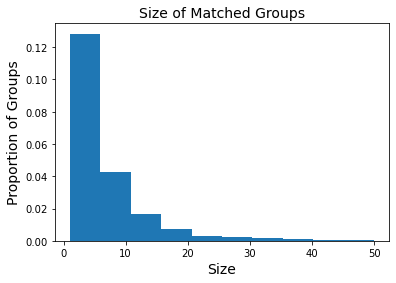

In [145]:
# analyze sizes of matched group (ATE is calculated based on a weighted average of CATE's)
sizes = [len(g) for g in model_flame_AMT.units_per_group]
sizes
# calculate a 5-number summary
from numpy import percentile
from numpy.random import rand
mean = sum(sizes)/len(sizes)

plt.hist(sizes, density=True, range=[1, 50], bins=10) 
plt.ylabel('Proportion of Groups', fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.title('Size of Matched Groups', fontsize=14)
srs = pd.Series(sizes)
print(srs.describe())

# Exact Matching

In [95]:
# Matching on all 9 covariates in the dataset.
model_flame_EX = dame_flame.matching.FLAME(repeats=False, verbose=3, early_stop_iterations=1, stop_unmatched_t = True, adaptive_weights='decisiontree', want_pe=True)


In [96]:
model_flame_EX.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_EX = model_flame_EX.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
9130 units matched. We stopped before doing iteration number:  1


In [97]:
# ATE Overall Using Exacxt Matching.
ate_6 = dame_flame.utils.post_processing.ATE(model_flame_EX)
ate_6 # 0.304

0.3042368978425022